<a href="https://colab.research.google.com/github/Rkjha6634/Credit-Risk-Analysis/blob/main/DATA_ANALYST_CREDIT_ASSEMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/credit_risk_dataset.csv')
df = pd.DataFrame(data)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
df.shape

(32581, 11)

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

137

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_amnt                   28501 non-null  int64  
 6   loan_int_rate               28501 non-null  float64
 7   loan_status                 28501 non-null  int64  
 8   loan_percent_income         28501 non-null  float64
 9   cb_person_default_on_file   28501 non-null  object 
 10  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [ ]:
def Cat_col(df):
  for col in df.columns:
    if df[col].dtype == 'O':
      plt.figure(figsize=(12,6))
      sns.countplot(data = df, x = col)
      plt.title("Count plot for {}".format(col))
      plt.xlabel('{}'.format(col))
      plt.ylabel('Count of {}'.format(col))
      plt.show

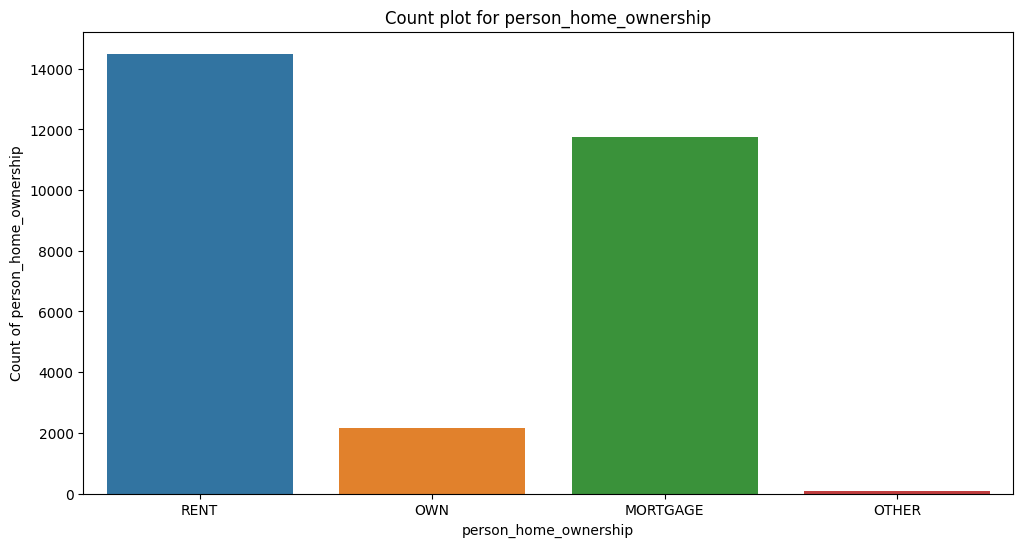

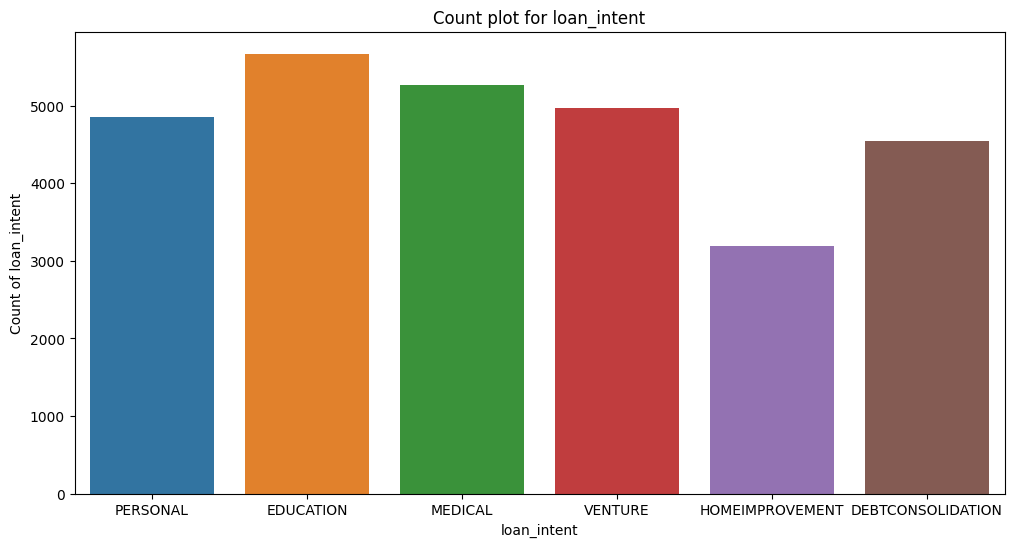

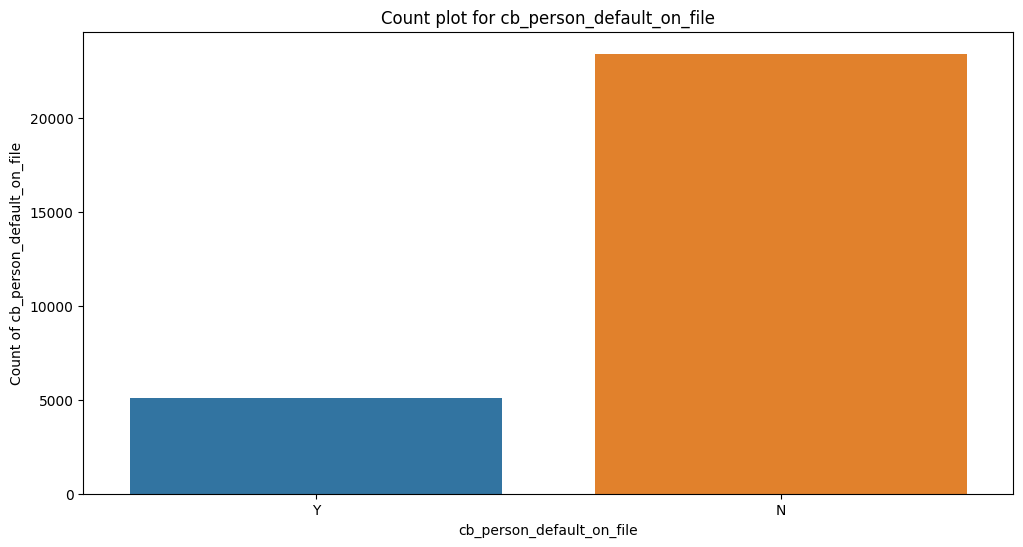

In [ ]:
Cat_col(df)

In [ ]:
df['person_age'].quantile(0.90)

36.0

In [ ]:
def handle_outlier(df, threshold=1.5):
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include='number').columns:
        Q1 = df_cleaned[col].quantile(0.10)
        Q3 = df_cleaned[col].quantile(0.90)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    return df_cleaned

In [ ]:
df = handle_outlier(df)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2


In [ ]:
df['person_emp_length'] = df['person_emp_length'].astype(int)

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28067 entries, 1 to 32577
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28067 non-null  int64  
 1   person_income               28067 non-null  int64  
 2   person_home_ownership       28067 non-null  object 
 3   person_emp_length           28067 non-null  int64  
 4   loan_intent                 28067 non-null  object 
 5   loan_amnt                   28067 non-null  int64  
 6   loan_int_rate               28067 non-null  float64
 7   loan_status                 28067 non-null  int64  
 8   loan_percent_income         28067 non-null  float64
 9   cb_person_default_on_file   28067 non-null  object 
 10  cb_person_cred_hist_length  28067 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.6+ MB


In [ ]:
def Numerical_Plot(data, column):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.boxplot(data=data, x=column)
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.histplot(data=data, x=column, kde=True)
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Distribution Plot\n", fontsize=15)

    plt.show()

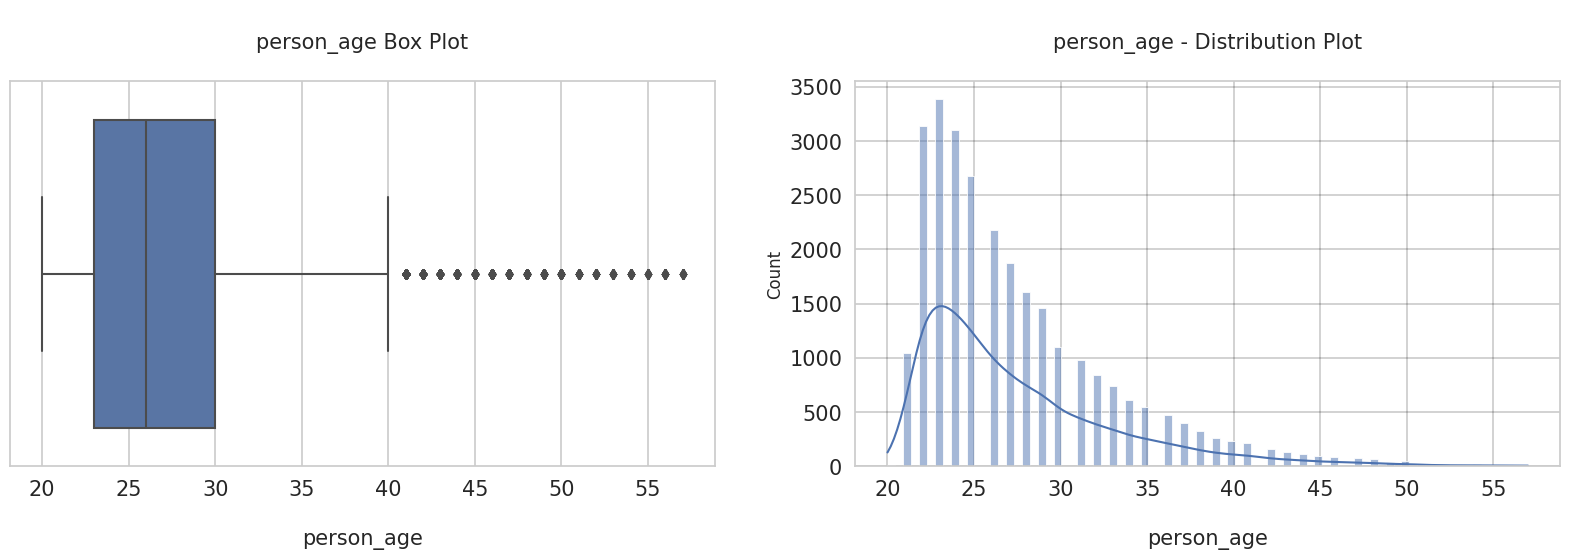

In [ ]:
Numerical_Plot(df, 'person_age')

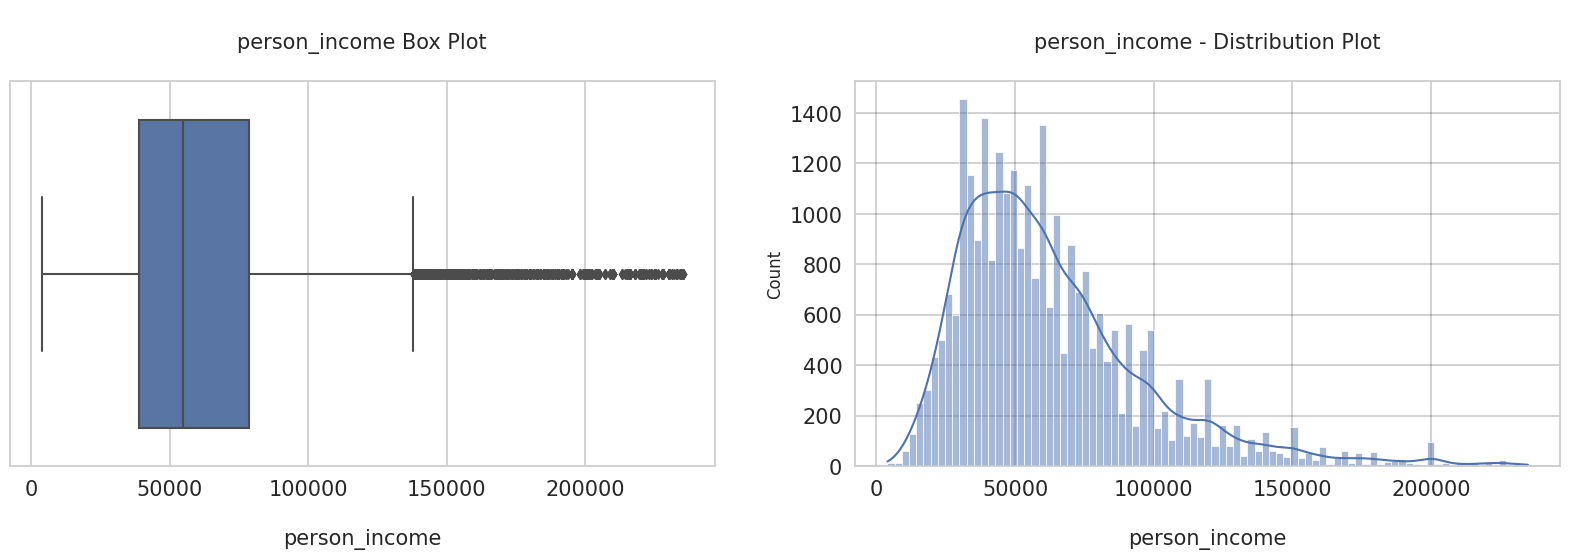

In [ ]:
Numerical_Plot(df, 'person_income')

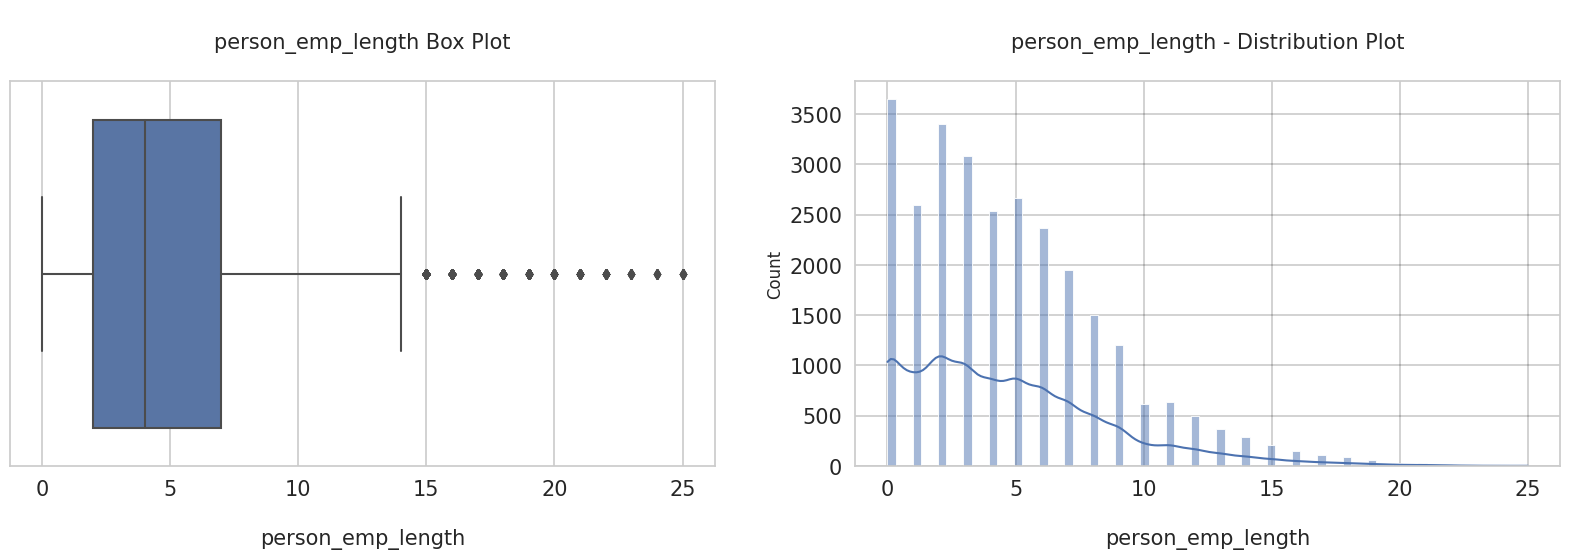

In [ ]:
Numerical_Plot(df, 'person_emp_length')

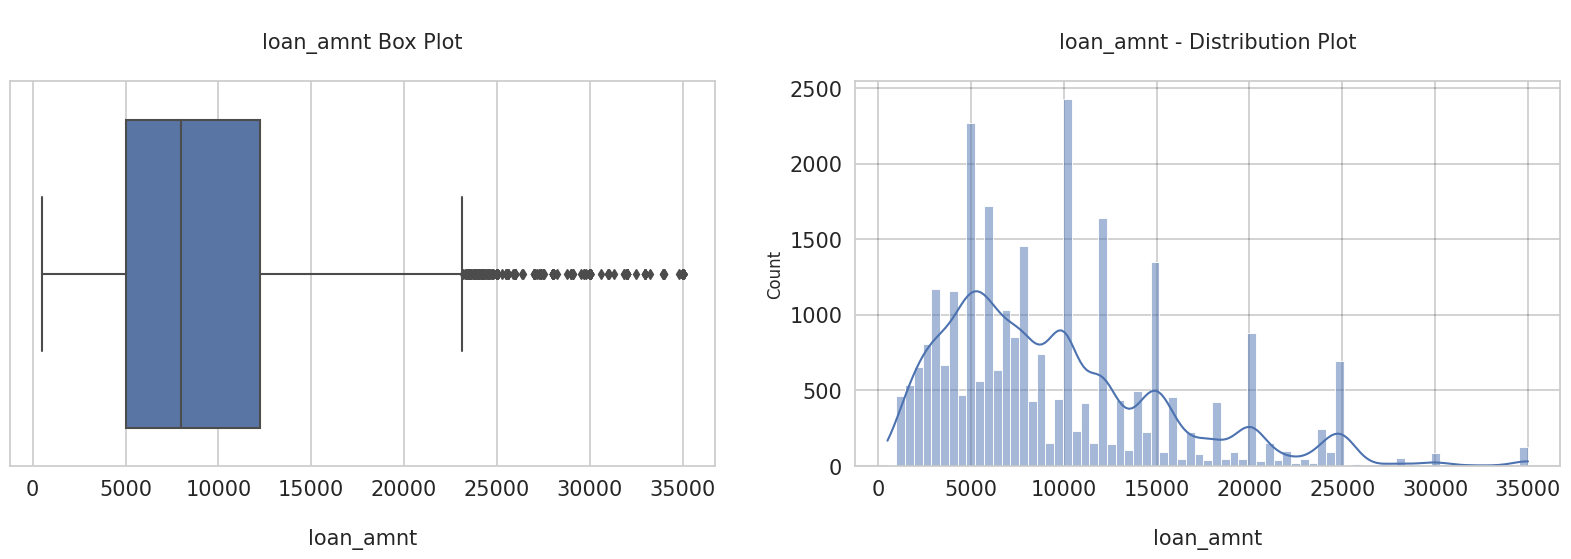

In [ ]:
Numerical_Plot(df, 'loan_amnt')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2


**EDA**

In [ ]:
print(df['loan_amnt'].mean())
print(df['loan_amnt'].median())
print(df['loan_amnt'].std())


9576.140128977091
8000.0
6237.75819495433





1.   The average loan value is around  9572.823602928049
2.   The median loan amount is  8,000.0 .This indicates that half of the loans
     have amounts higher than  8,000.0, and half have amounts lower than $8,000.0.
3.   The standard deviation is approximately  6235.097981705868





In [ ]:
loan_intent_amount = df.groupby('loan_intent')['loan_amnt'].mean().reset_index()
loan_intent_amount

,loan_intent,loan_amnt
0,DEBTCONSOLIDATION,9596.726522
1,EDUCATION,9447.075321
2,HOMEIMPROVEMENT,10284.762512
3,MEDICAL,9277.920200
4,PERSONAL,9573.886661
5,VENTURE,9569.500510


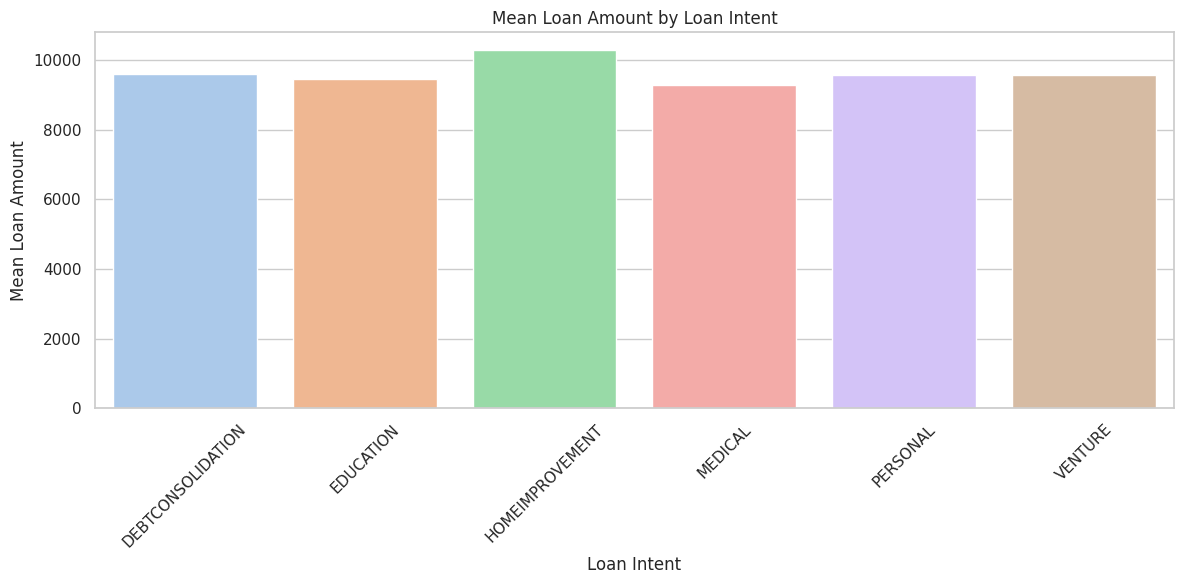

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
colors = sns.color_palette('pastel')
sns.barplot(x='loan_intent', y='loan_amnt', data=loan_intent_amount, palette=colors)
plt.xlabel('Loan Intent')
plt.ylabel('Mean Loan Amount')
plt.title('Mean Loan Amount by Loan Intent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1.    The mean loan amount for debt consolidation purposes is approximately
      9597.33

2.   The mean loan amount for education purposes is approximately 9,445.07

3.   The mean loan amount for home improvement purposes is approximately 10,277.93.
4.  The mean loan amount for medical purposes is approximately 9,268.78.

5. The mean loan amount for personal purposes is approximately 9,572.81.

6. The mean loan amount for venture purposes is approximately 9,567.47.







In [ ]:
correlation = df['cb_person_cred_hist_length'].corr(df['loan_int_rate'])
correlation

0.013670542486835092

There is no linear relationship between 'Loan Interest Rate' and 'Credit History Length,' indicating that there is no significant effect of loan interest rate on credit history length, and vice versa.

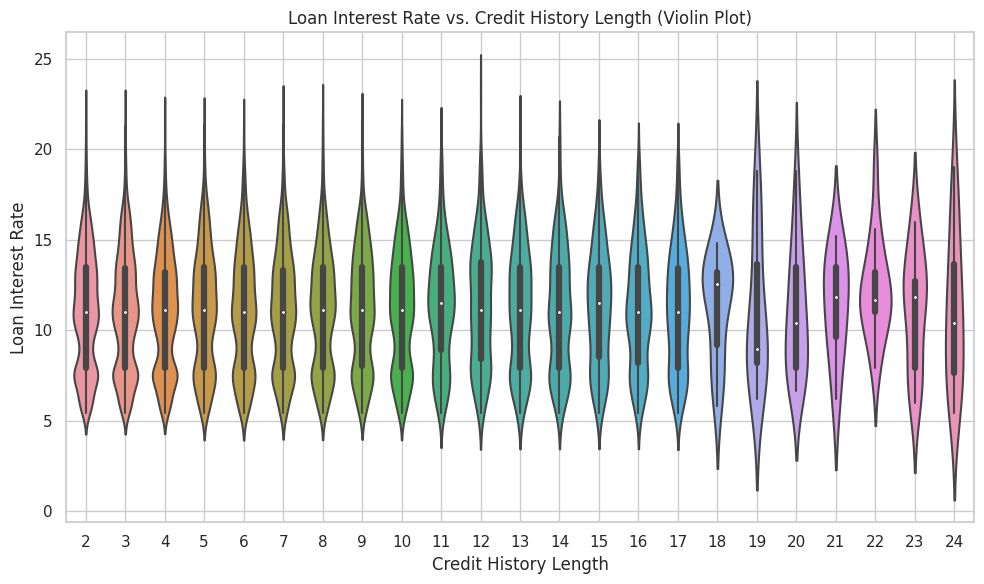

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cb_person_cred_hist_length', y='loan_int_rate', data=df)
plt.xlabel('Credit History Length')
plt.ylabel('Loan Interest Rate')
plt.title('Loan Interest Rate vs. Credit History Length (Violin Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
num_defaulted_loans = df[df['loan_status'] == 1]['loan_status'].count()
num_not_defaulted_loans = df[df['loan_status'] == 0]['loan_status'].count()


default_rate = num_defaulted_loans / (num_defaulted_loans + num_not_defaulted_loans)
default_rate_percentage = default_rate * 100
print("Default Rate: {:.2f}%".format(default_rate_percentage))


Default Rate: 21.77%


The dataset indicates a default rate of approximately 21.78%. This means that out of the total loans in the dataset, approximately 21.78% have defaulted (loan_status = 1), while the remaining loans (about 78.22%) have not defaulted (loan_status = 0)

In [ ]:
default_rates_by_emp_length = df.groupby('person_emp_length')['loan_status'].mean().reset_index()
default_rates_by_emp_length.columns = ['person_emp_length', 'default_rate']
default_rates_by_emp_length

,person_emp_length,default_rate
0,0,0.282305
1,1,0.280262
2,2,0.258083
3,3,0.203379
4,4,0.212456
5,5,0.189402
6,6,0.191282
7,7,0.189300
8,8,0.167331
9,9,0.188695


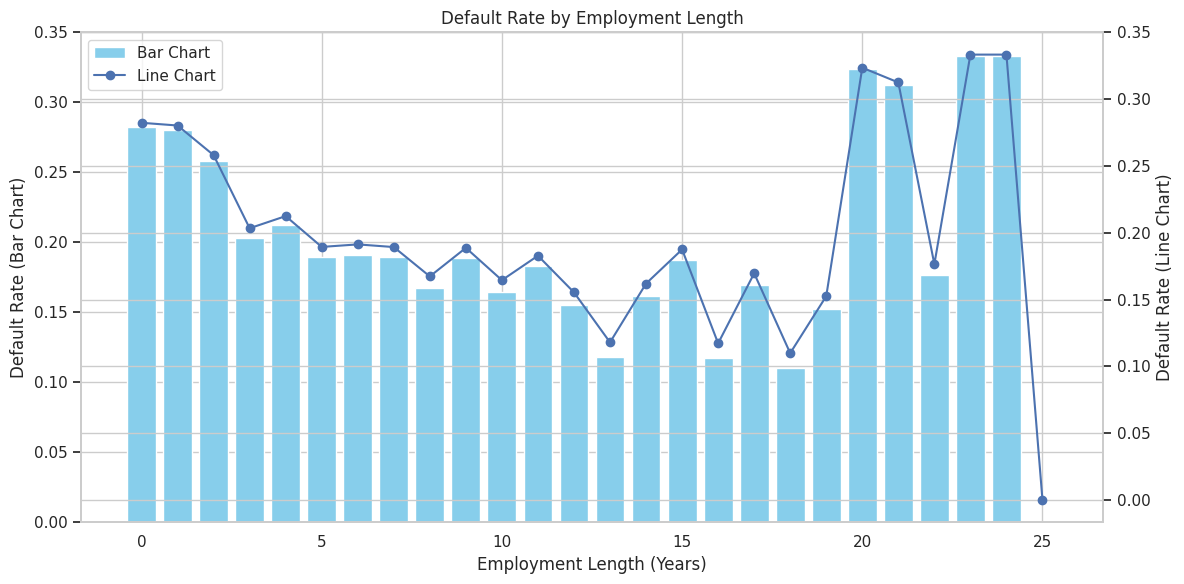

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(default_rates_by_emp_length['person_emp_length'], default_rates_by_emp_length['default_rate'], color='skyblue', label='Bar Chart')
ax1.set_xlabel('Employment Length (Years)')
ax1.set_ylabel('Default Rate (Bar Chart)')
ax1.set_title('Default Rate by Employment Length')
ax2 = ax1.twinx()
ax2.plot(default_rates_by_emp_length['person_emp_length'], default_rates_by_emp_length['default_rate'], marker='o', color='b', linestyle='-', label='Line Chart')
ax2.set_ylabel('Default Rate (Line Chart)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



1.   we observe higher default rates among individuals with shorter employment histories, particularly those with less than five years of employment . This suggests that borrowers who have been employed for a shorter duration tend to exhibit slightly higher default rates
2.   As employment length extends beyond five years, there is a notable trend of decreasing default rates. Individuals with ten or more years of employment experience significantly lower default rates, indicating a potential correlation between longer job stability and reduced credit risk



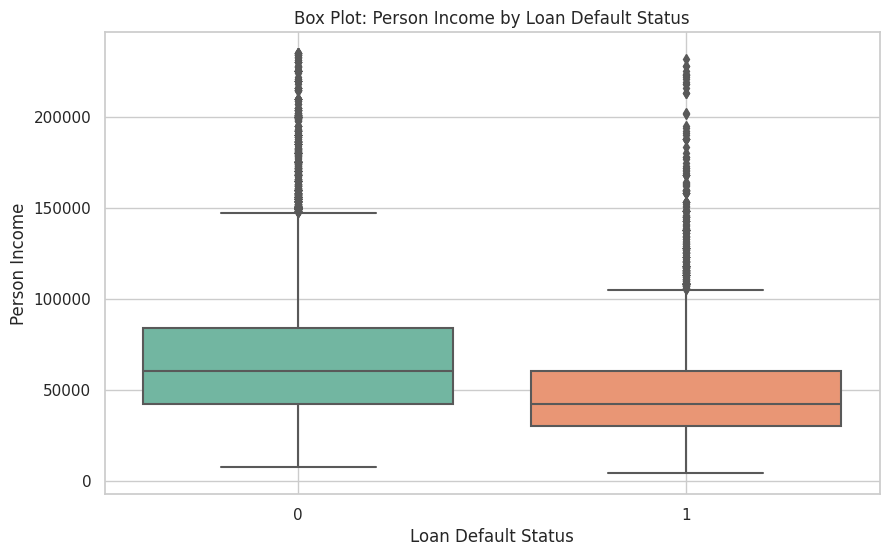

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='person_income', data=df, palette='Set2')
plt.xlabel('Loan Default Status')
plt.ylabel('Person Income')
plt.title('Box Plot: Person Income by Loan Default Status')
plt.grid(True)
plt.show()

In [ ]:
default_rates_by_home_ownership = df.groupby('person_home_ownership')['loan_status'].mean().reset_index()
default_rates_by_home_ownership.columns = ['person_home_ownership', 'default_rate']
default_rates_by_home_ownership

,person_home_ownership,default_rate
0,MORTGAGE,0.126622
1,OTHER,0.300000
2,OWN,0.067164
3,RENT,0.312613


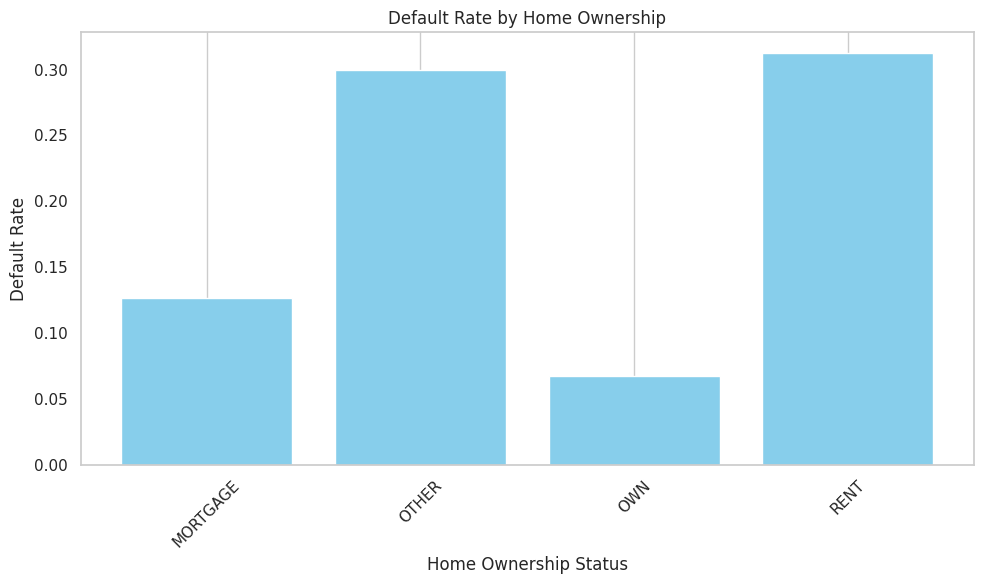

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(default_rates_by_home_ownership['person_home_ownership'], default_rates_by_home_ownership['default_rate'], color='skyblue')
plt.xlabel('Home Ownership Status')
plt.ylabel('Default Rate')
plt.title('Default Rate by Home Ownership')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



1.  Borrowers who own their homes  exhibit the lowest default rate among the categories, with an approximate default rate of 6.74%. This suggests that individuals who own their homes tend to have a lower likelihood of defaulting on loans
2.    individuals who rent their homes  have the highest default rate,
approximately 31.26%. This indicates that renters may face a higher risk of loan default compared to homeowners
3. Borrowers with a mortgage  show a moderate default rate of around 12.67%
4. The 'OTHER' category has a default rate of approximately 30.00%



In [ ]:
average_default_rates_by_credit_history = df.groupby('cb_person_cred_hist_length')['loan_status'].mean().reset_index()
average_default_rates_by_credit_history.columns = ['credit_history_length', 'average_default_rate']
print(average_default_rates_by_credit_history)

    credit_history_length  average_default_rate
0                       2              0.234976
1                       3              0.223123
2                       4              0.223532
3                       5              0.202199
4                       6              0.207841
5                       7              0.195995
6                       8              0.208435
7                       9              0.212623
8                      10              0.208881
9                      11              0.182278
10                     12              0.210145
11                     13              0.191489
12                     14              0.204276
13                     15              0.221918
14                     16              0.224000
15                     17              0.191617
16                     18              0.250000
17                     19              0.363636
18                     20              0.238095
19                     21              0



1.   Borrowers with shorter credit histories, particularly those with histories of 2 to 5 years, tend to have higher average default rates ,borrowers with a credit history of 2 years have an average default rate of approximately 23.50%, and this gradually decreases to around 20.24% for those with a 5-year credit history.

2.  Credit history length of 5 years there is a relative stabilization in average default rates. Borrowers with credit histories of 6 to 10 years exhibit default rates in the range of 20.81% to 21.83%.

3.   Borrowers with credit histories of 11 years or more demonstrate lower average default rates pproximately 18.23%.
4.   Borrowers with very long credit histories (e.g., 18 to 22 years), with notably high default rates





In [ ]:
default_rates_by_default_history = df.groupby('cb_person_default_on_file')['loan_status'].mean().reset_index()

default_rates_by_default_history.columns = ['previous_default', 'default_rate']

print(default_rates_by_default_history)

  previous_default  default_rate
0                N      0.182729
1                Y      0.379200




1.   Individuals with a previous default ('Y') have a significantly higher default rate, approximately 37.96%. This suggests that having a history of defaulting on loans significantly increases the likelihood of defaulting on a new loan.
2.   ndividuals without a previous default ('N') exhibit a substantially lower default rate, approximately 18.27%. This indicates that borrowers with a clean history of repaying loans tend to have a lower likelihood of defaulting on new loans.



In [ ]:
loan_purpose_counts = df['loan_intent'].value_counts()
loan_purpose_counts

EDUCATION            5616
MEDICAL              5188
VENTURE              4905
PERSONAL             4738
DEBTCONSOLIDATION    4483
HOMEIMPROVEMENT      3137
Name: loan_intent, dtype: int64

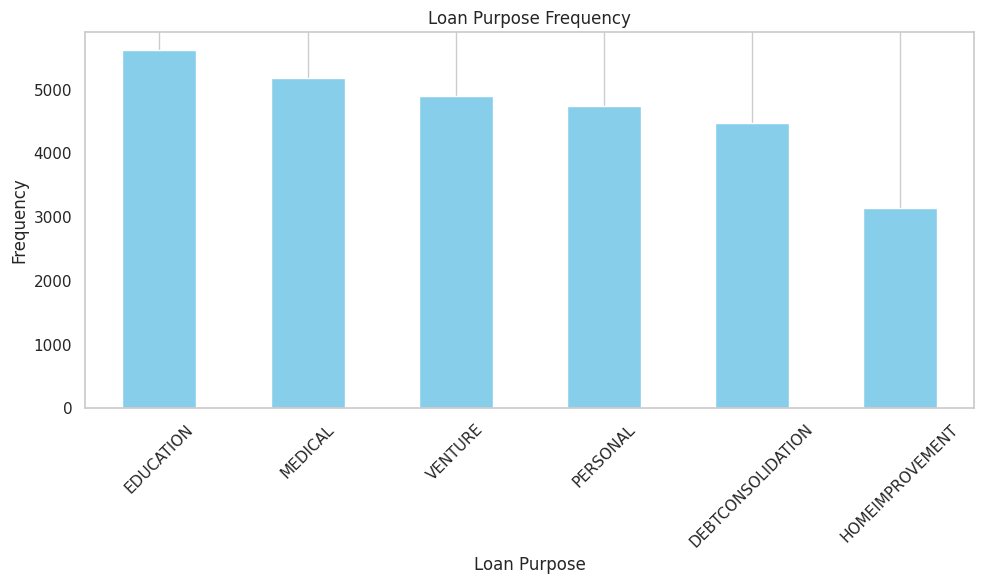

In [ ]:


plt.figure(figsize=(10, 6))
loan_purpose_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.title('Loan Purpose Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The most common loan purpose among the dataset appears to be 'EDUCATION,' with a frequency of 5,611 loans. This suggests that a significant number of borrowers are using loans for educational purposes followed by medical etc...

In [ ]:
correlation= df['person_income'].corr(df['loan_amnt'])
correlation


0.39844683190102714

A positive correlation coefficient of 0.3970 suggests that there is a moderate positive linear relationship between a person's income and the loan amount they request. In other words, individuals with higher incomes tend to request higher loan amounts, and those with lower incomes tend to request lower loan amounts.

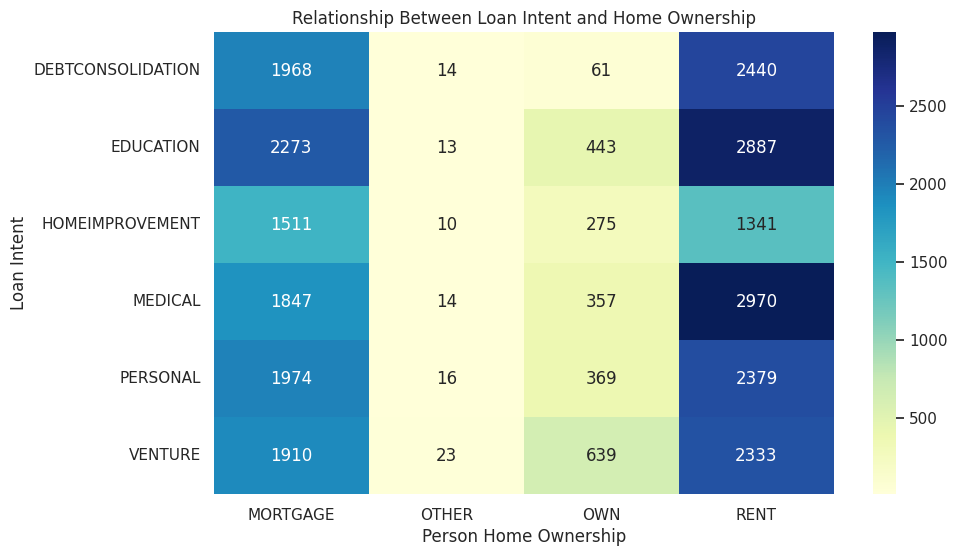

In [ ]:
cross_tab = pd.crosstab(df['loan_intent'], df['person_home_ownership'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Person Home Ownership')
plt.ylabel('Loan Intent')
plt.title('Relationship Between Loan Intent and Home Ownership')
plt.show()

In [ ]:
default_history_mode = df['cb_person_default_on_file'].mode()[0]
num_individuals_with_default = (df['cb_person_default_on_file'] == default_history_mode).sum()
print(f"Mode of 'cb_person_default_on_file': {default_history_mode}")
print(f"Number of individuals with a previous default ('Y'): {num_individuals_with_default}")

Mode of 'cb_person_default_on_file': N
Number of individuals with a previous default ('Y'): 23067


The dataset contains a majority of individuals who do not have a previous default ('N'), but a substantial number of individuals (23,015) have a history of previous default ('Y')



In [ ]:
default_rates_by_home_ownership = df.groupby('person_home_ownership')['loan_status'].mean().reset_index()

default_rates_by_home_ownership.columns = ['home_ownership', 'default_rate']


default_rates_by_home_ownership = default_rates_by_home_ownership.sort_values(by='default_rate', ascending=False)


print(default_rates_by_home_ownership)

  home_ownership  default_rate
3           RENT      0.312613
1          OTHER      0.300000
0       MORTGAGE      0.126622
2            OWN      0.067164


There is a notable variation in default rates among different categories of 'person_home_ownership.' Renters ('RENT') and individuals with 'OTHER' types of home ownership have relatively higher default rates, while those with 'MORTGAGE' and 'OWN' ownership types tend to have lower default rates

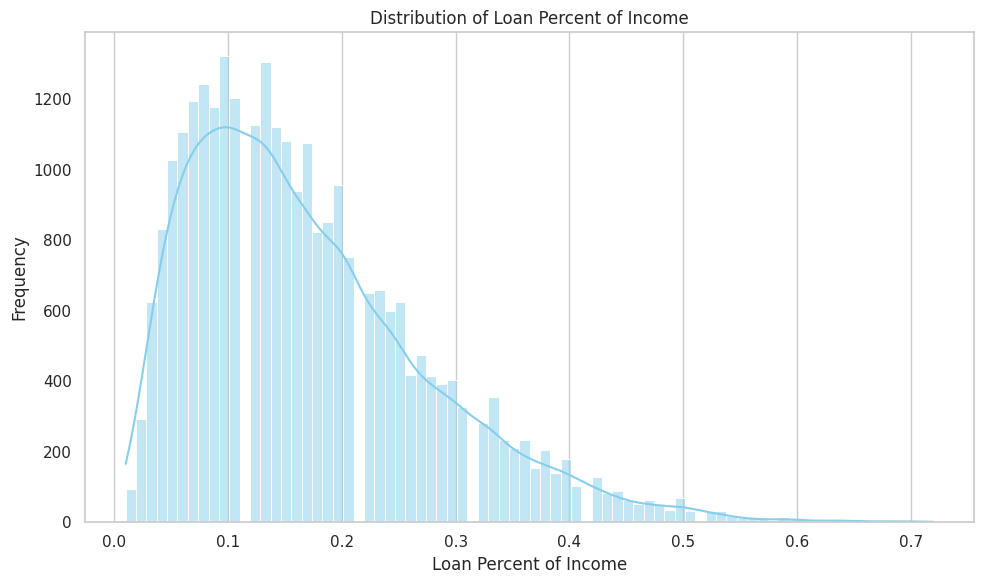

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_percent_income'], kde=True, color='skyblue')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Percent of Income')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
approval_rates_by_intent = df.groupby('loan_intent')['loan_status'].mean().reset_index()

approval_rates_by_intent.columns = ['loan_intent', 'approval_rate']
approval_rates_by_intent['approval_rate'] *= 100
approval_rates_by_intent = approval_rates_by_intent.sort_values(by='approval_rate', ascending=False)

print(approval_rates_by_intent)

         loan_intent  approval_rate
0  DEBTCONSOLIDATION      28.373857
3            MEDICAL      26.927525
2    HOMEIMPROVEMENT      25.820848
4           PERSONAL      20.050654
1          EDUCATION      17.058405
5            VENTURE      14.760449


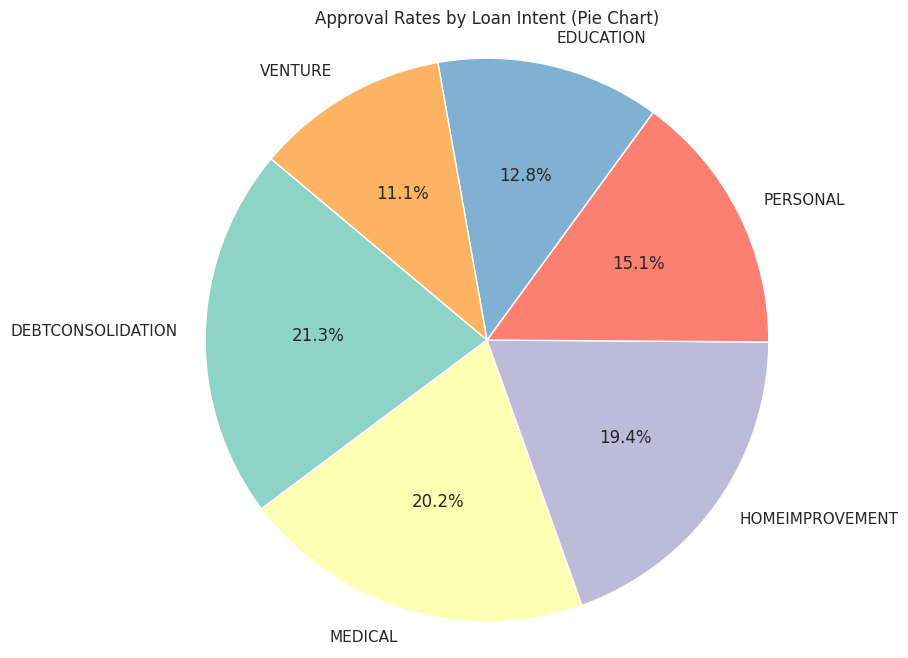

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(approval_rates_by_intent['approval_rate'], labels=approval_rates_by_intent['loan_intent'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(approval_rates_by_intent)))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Approval Rates by Loan Intent (Pie Chart)')
plt.show()

The approval rates for loan applications vary significantly among different 'loan_intent' categories. Loans for debt consolidation, medical expenses, and home improvement tend to have higher approval rates, while loans for personal use, education, and venture/business purposes have relatively lower approval rates

In [ ]:
default_rates_by_cred_hist_length = df.groupby('cb_person_cred_hist_length')['loan_status'].mean().reset_index()

default_rates_by_cred_hist_length.columns = ['credit_history_length', 'default_rate']


print(default_rates_by_cred_hist_length)

    credit_history_length  default_rate
0                       2      0.234976
1                       3      0.223123
2                       4      0.223532
3                       5      0.202199
4                       6      0.207841
5                       7      0.195995
6                       8      0.208435
7                       9      0.212623
8                      10      0.208881
9                      11      0.182278
10                     12      0.210145
11                     13      0.191489
12                     14      0.204276
13                     15      0.221918
14                     16      0.224000
15                     17      0.191617
16                     18      0.250000
17                     19      0.363636
18                     20      0.238095
19                     21      0.375000
20                     22      0.312500
21                     23      0.153846
22                     24      0.266667


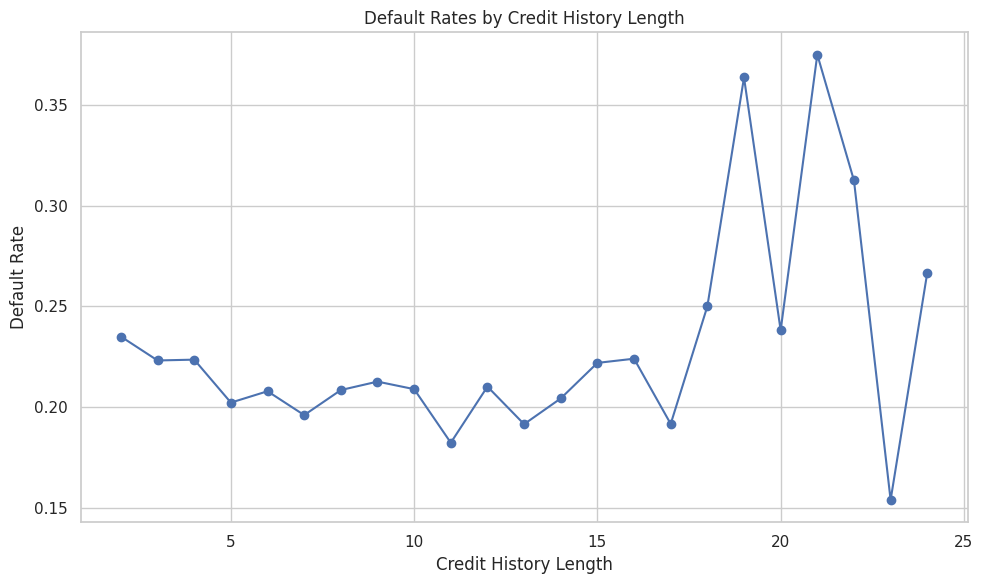

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(default_rates_by_cred_hist_length['credit_history_length'], default_rates_by_cred_hist_length['default_rate'], marker='o', linestyle='-')
plt.xlabel('Credit History Length')
plt.ylabel('Default Rate')
plt.title('Default Rates by Credit History Length')
plt.grid(True)
plt.tight_layout()
plt.show()

there is a non-linear relationship between credit history length and default rates. While shorter credit histories are associated with higher default rates, individuals with credit histories around 11 years tend to have a lower likelihood of defaulting

In [ ]:
approval_rates_by_intent.columns = ['loan_intent', 'approval_rate']

approval_rates_by_intent['approval_rate'] *= 100

approval_rates_by_intent = approval_rates_by_intent.sort_values(by='approval_rate', ascending=False)


print(approval_rates_by_intent)

         loan_intent  approval_rate
0  DEBTCONSOLIDATION    2837.385679
3            MEDICAL    2692.752506
2    HOMEIMPROVEMENT    2582.084794
4           PERSONAL    2005.065428
1          EDUCATION    1705.840456
5            VENTURE    1476.044852


In [ ]:
correlation_matrix = df[['cb_person_cred_hist_length', 'person_emp_length', 'loan_int_rate']].corr()
correlation_matrix

,cb_person_cred_hist_length,person_emp_length,loan_int_rate
cb_person_cred_hist_length,1.000000,0.149644,0.013671
person_emp_length,0.149644,1.000000,-0.061270
loan_int_rate,0.013671,-0.061270,1.000000


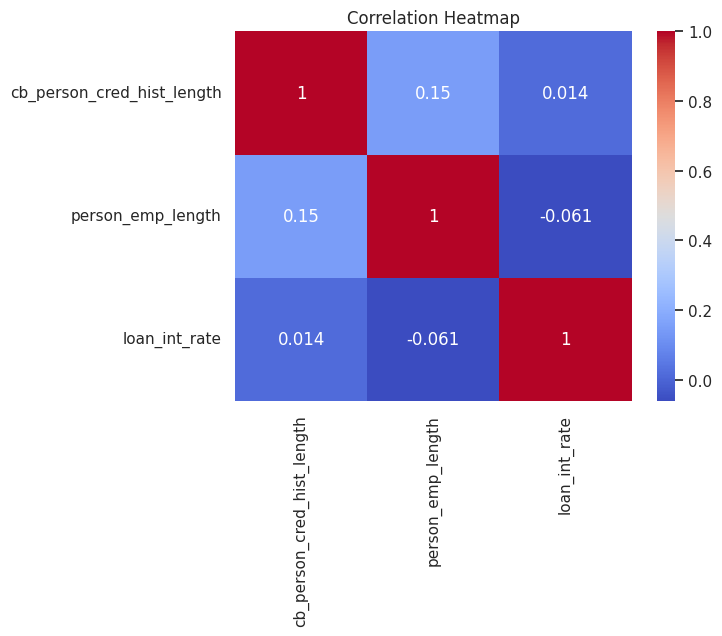

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Longer credit history ('cb_person_cred_hist_length') does not appear to have a significant impact on loan interest rates.
There is a weak negative correlation between employment length ('person_emp_length') and loan interest rates, suggesting that, on average, individuals with longer employment histories may have slightly lower interest rates, but the relationship is not strong

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder



In [ ]:
df['target'] = LabelEncoder().fit_transform(df['cb_person_default_on_file'])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,target
1,21,9600,OWN,5,EDUCATION,1000,11.14,0,0.10,N,2,0
2,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,1,0.57,N,3,0
3,23,65500,RENT,4,MEDICAL,35000,15.23,1,0.53,N,2,0
4,24,54400,RENT,8,MEDICAL,35000,14.27,1,0.55,Y,4,1
5,21,9900,OWN,2,VENTURE,2500,7.14,1,0.25,N,2,0


In [ ]:
df=pd.get_dummies(df,columns=['person_home_ownership','loan_intent'],prefix='',prefix_sep=' ')
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,target,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,21,9600,5,1000,11.14,0,0.10,N,2,0,0,0,1,0,0,1,0,0,0,0
2,25,9600,1,5500,12.87,1,0.57,N,3,0,1,0,0,0,0,0,0,1,0,0
3,23,65500,4,35000,15.23,1,0.53,N,2,0,0,0,0,1,0,0,0,1,0,0
4,24,54400,8,35000,14.27,1,0.55,Y,4,1,0,0,0,1,0,0,0,1,0,0
5,21,9900,2,2500,7.14,1,0.25,N,2,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df = df.drop(columns=[ 'cb_person_default_on_file'], axis=1)
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,target,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,21,9600,5,1000,11.14,0,0.10,2,0,0,0,1,0,0,1,0,0,0,0
2,25,9600,1,5500,12.87,1,0.57,3,0,1,0,0,0,0,0,0,1,0,0
3,23,65500,4,35000,15.23,1,0.53,2,0,0,0,0,1,0,0,0,1,0,0
4,24,54400,8,35000,14.27,1,0.55,4,1,0,0,0,1,0,0,0,1,0,0
5,21,9900,2,2500,7.14,1,0.25,2,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
scaler = StandardScaler()

In [ ]:
numerical_columns_to_scale = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [ ]:
df[numerical_columns_to_scale] = scaler.fit_transform(df[numerical_columns_to_scale])

In [ ]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,target,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
1,-1.141268,-1.552270,0.064646,-1.374900,0.031560,0,-0.665634,-0.974566,0,0,0,1,0,0,1,0,0,0,0
2,-0.439436,-1.552270,-0.946166,-0.653474,0.567396,1,3.771597,-0.708650,0,1,0,0,0,0,0,0,1,0,0
3,-0.790352,0.061247,-0.188057,4.075873,1.298364,1,3.393960,-0.974566,0,0,0,0,1,0,0,0,1,0,0
4,-0.614894,-0.259147,0.822754,4.075873,1.001021,1,3.582778,-0.442735,1,0,0,0,1,0,0,0,1,0,0
5,-1.141268,-1.543610,-0.693463,-1.134425,-1.207369,1,0.750504,-0.974566,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X = df.drop('target',axis = 1 )
y = df['target']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

classification_report_text = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report_text)

Accuracy: 0.82
Confusion Matrix:
[[4329  327]
 [ 677  281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4656
           1       0.46      0.29      0.36       958

    accuracy                           0.82      5614
   macro avg       0.66      0.61      0.63      5614
weighted avg       0.80      0.82      0.80      5614

